# Semi-supervised learning

Alumno: Ignacio Sánchez Herrera

In [1]:
from sklearn.datasets import load_digits
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

## Carga y visualización del dataset

In [2]:
# Load
digits = load_digits()

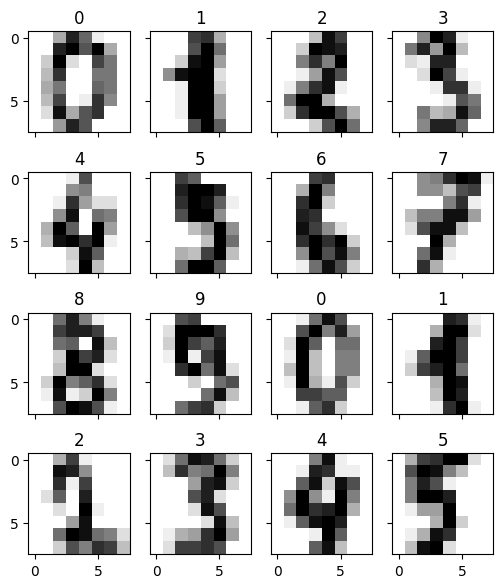

In [3]:
# Visualize first 16 images with labels
fig, axs = plt.subplots(nrows=4, ncols=4, sharey=True, sharex=True, figsize=(6, 7))
for i in range(0, 4):
    for j in range(0, 4):
        axs[i, j].imshow(digits.images[i * 4 + j], cmap=plt.cm.gray_r)
        axs[i, j].set_title(digits.target[i * 4 + j])

In [4]:
# Split features and labels:
X = digits.data
y = digits.target

## Preparación de datos para SSL


In [100]:
percent_labeled = 0.1 # Percent labeled data
n_labeled = round(percent_labeled * len(X)) # Num labeled data


In [101]:
# Check distribution if we label the first n elements
n_labeled_per_class = [0] * 10
for x in y[:n_labeled]:
    n_labeled_per_class[x] += 1
n_labeled_per_class

[20, 18, 16, 17, 17, 20, 17, 18, 18, 19]

Por la distribución de los datos, vemos que seleccionando las *n* primeras etiquetas obtenemos una distribución balanceada de
las clases en el conjunto de datos etiquetados.

In [102]:
# Set labeled data
y_ssl = y.copy()
y_ssl[n_labeled:] = -1
y_ssl

for i in range(0, 10):
    print(f"Count label '{i}': ", np.count_nonzero(y_ssl == i))
print(f"Count labeled data: ", np.count_nonzero(y_ssl != -1))
print(f"Count unlabeled data: ", np.count_nonzero(y_ssl == -1))

Count label '0':  20
Count label '1':  18
Count label '2':  16
Count label '3':  17
Count label '4':  17
Count label '5':  20
Count label '6':  17
Count label '7':  18
Count label '8':  18
Count label '9':  19
Count labeled data:  180
Count unlabeled data:  1617


## Implementación de Label Propagation

In [103]:
model = LabelPropagation(kernel='rbf', gamma=0.25, max_iter=10000)
model.fit(X, y_ssl)

LabelPropagation(gamma=0.25, max_iter=10000)

## Evaluación del modelo

In [104]:
predicted_labels = model.transduction_[n_labeled:]
true_labels = y[n_labeled:]

print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       158
           1       0.83      0.64      0.72       164
           2       0.84      0.92      0.88       161
           3       0.92      0.84      0.88       166
           4       0.96      0.93      0.94       164
           5       0.93      0.80      0.86       162
           6       0.91      0.98      0.94       164
           7       0.92      0.96      0.94       161
           8       0.77      0.83      0.80       156
           9       0.67      0.80      0.73       161

    accuracy                           0.87      1617
   macro avg       0.87      0.87      0.87      1617
weighted avg       0.87      0.87      0.87      1617



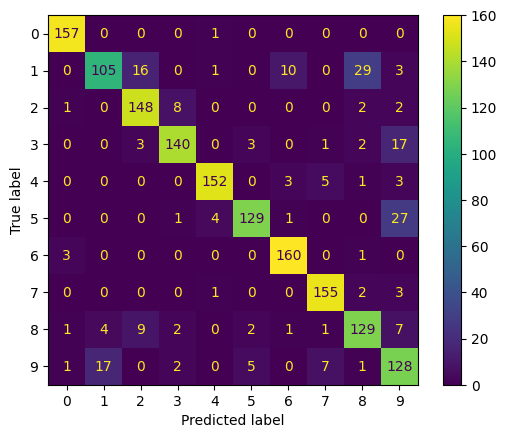

In [105]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    true_labels, predicted_labels, labels=model.classes_
)

## Experimentación con diferentes tamaños de conjuntos etiquetados

In [110]:
percent_labeled = [0.2, 0.35, 0.5, 0.7, 0.8]

for percent in percent_labeled:
    print("################################")
    print(f"% labeled data: {percent*100}%")
    n_labeled = round(percent * len(X)) # Num labeled data

    y_ssl = y.copy()
    y_ssl[n_labeled:] = -1
    y_ssl

    model = LabelPropagation(kernel='rbf', gamma=0.25, max_iter=10000)
    model.fit(X, y_ssl)

    predicted_labels = model.transduction_[n_labeled:]
    true_labels = y[n_labeled:]
    
    print(classification_report(true_labels, predicted_labels))
    print("################################")

################################
% labeled data: 20.0%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       140
           1       0.83      0.73      0.78       144
           2       0.87      0.92      0.90       141
           3       0.89      0.86      0.87       145
           4       0.98      0.96      0.97       147
           5       0.96      0.94      0.95       146
           6       0.93      0.99      0.96       145
           7       0.98      0.91      0.95       144
           8       0.82      0.89      0.85       140
           9       0.78      0.82      0.80       146

    accuracy                           0.90      1438
   macro avg       0.90      0.90      0.90      1438
weighted avg       0.90      0.90      0.90      1438

################################
################################
% labeled data: 35.0%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99

## Conclusiones

Como vemos, entrenando el modelo con tan solo un 10% de los 
datos etiquetados se obtienen un 87% de predicciones correctas,
lo que se puede decir que es muy buen resultado.

Como es de esperar, a medida que el número de datos etiquetados
incrementa, el porcentaje de predicciones correctas aumenta hasta
un 96% con el 80% de las etiquetas.

En este caso, podemos considerar que el aprendizaje semi supervisado
ha dado buenos resultados. Sin embargo, podemos observar limitaciones
en este:

- Es necesario que la calidad de las etiquetas que tenemos sea buena debido
a que normalmente el conjunto de datos etiquetados es pequeño, por lo que 
el ruido en este puede provocar grandes desajustes.

- Dificil evaluación de los datos obtenidos en casos reales en los que se 
tienen muy pocas instancias etiquetadas